<a href="https://colab.research.google.com/github/namanphy/EVA5/blob/main/S12/AnchorBoxes_S12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

! git clone https://github.com/namanphy/EVA5.git
sys.path.append('EVA5/S12/')

Cloning into 'EVA5'...
remote: Enumerating objects: 551, done.
remote: Counting objects: 100% (551/551), done.
remote: Compressing objects: 100% (393/393), done.
remote: Total 1037 (delta 206), reused 483 (delta 149), pack-reused 486
Receiving objects: 100% (1037/1037), 22.42 MiB | 38.64 MiB/s, done.
Resolving deltas: 100% (485/485), done.


In [26]:
import os
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

## Data preparation - bounding boxes

In [10]:
def load_json(path):
    with open(path) as f:
        data = json.loads(f.read())
    return data


def fetch_image_size(path):
    image_sizes = {}
    for image_file in os.listdir(path):
        image_path = os.path.join(path, image_file)
        img_obj = cv2.imread(image_path)
        image_sizes[image_file] = img_obj.shape
    return image_sizes


def parse_data(bbox_data, image_sizes):
    data_points = []
    for _, item in bbox_data.items():
        for region in item['regions']:
            data_points.append((
                region['shape_attributes']['width']/image_sizes[item['filename']][1],
                region['shape_attributes']['height']/image_sizes[item['filename']][0]
                # region['region_attributes']['class_name']
            ))
    data_points = np.array(data_points)
    return data_points

In [11]:
path_json = '/content/EVA5/S12/annotations.json'
path_images = '/content/EVA5/S12/images/dataset'

bbox_raw_data = load_json(path_json)
image_sizes = fetch_image_size(path_images)
data_points = parse_data(bbox_raw_data, image_sizes)

In [ ]:
data_points

## Data Visualisation

Text(0, 0.5, 'height')

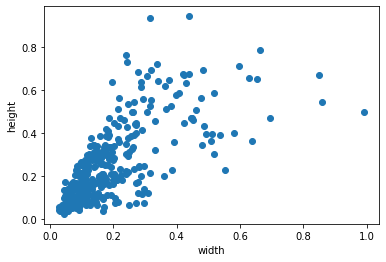

In [12]:
plt.scatter(data_points[:, 0], data_points[:, 1])
plt.xlabel('width')
plt.ylabel('height')
plt.title('Plotting the points')

Text(0.5, 1.0, 'Plotting the log of points')

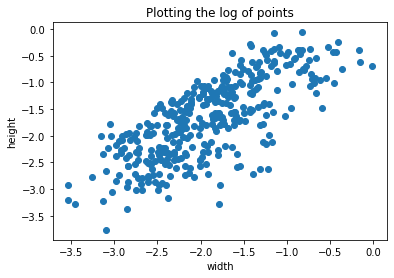

In [13]:
plt.scatter(np.log(data_points[:, 0]), np.log(data_points[:, 1]))
plt.xlabel('width')
plt.ylabel('height')
plt.title('Plotting the log of points')

## K-Means - identifying appropiate cluster size

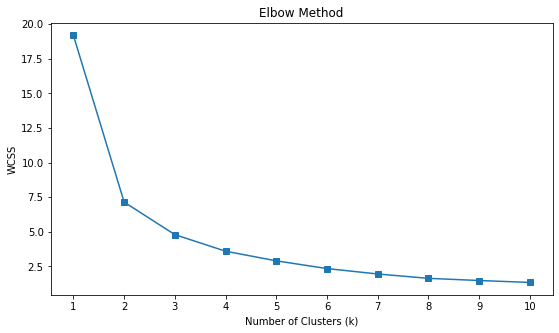

In [48]:
def plot_elbow_graph(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    fig = plt.figure(figsize=(9, 5))
    _ = plt.plot(wcss, '-s')

    plt.xticks(np.arange(10), np.arange(1, 11))
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    fig.savefig('elbow.png')
    return kmeans


kmeans = plot_elbow_graph(data_points)

**For the above plot, k = 4 or k = 5 seems to be the best choice because after cluster number 4, the curve becomes almost linear.**



### Plotting Clusters

In [45]:
def plot_clusters(num_clusters, data):
    kmeans = KMeans(n_clusters=num_clusters).fit(data)
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(9, 6))
    plt.scatter(data[:, 0], data[:, 1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='s')
    plt.xlabel('width')
    plt.ylabel('height')
    plt.title(f'Cluster Plot for k = {num_clusters}')
    plt.savefig(f'cluster_plot_k{num_clusters}.png')


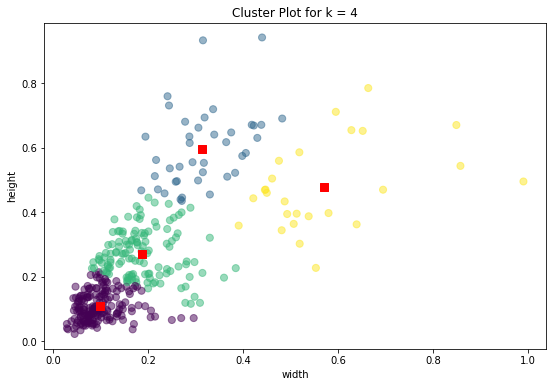

In [46]:
plot_clusters(4, data_points)

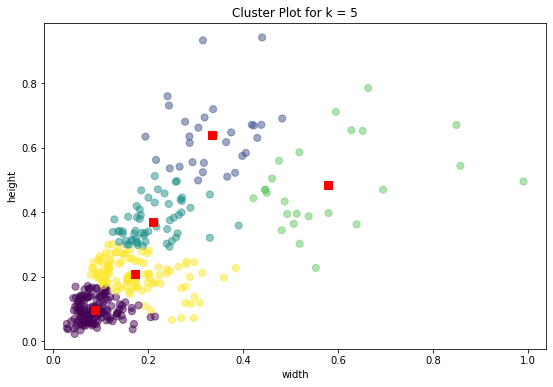

In [47]:
plot_clusters(5, data_points)